# Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information-

1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

### Predict : Type of glass

### Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

•	https://github.com/dsrscientist/dataset3


In [1]:
#lets import necessary library


import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
header=[ 'Id_number','refractive_index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type_of_glass']


df.columns = header

In [4]:
df.head()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.shape #The Total number of data (same as df)

(213, 11)

In [6]:
df.columns #to see the columns names

Index(['Id_number', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum',
       'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [7]:
df.isnull().sum() #checking for null values in the dataframe

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

In [8]:
df.dtypes #checking for data type

Id_number             int64
refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

In [9]:
df.describe()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## analyzing the data

In [10]:
df['Type_of_glass'].unique() # we see there is object data in the int data

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [11]:
#replacing 1 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(1,0)

#replacing 2 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(2,0)

#replacing 3 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(3,0)

#replacing 5 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(5,1)

#replacing 6 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(6,1)

#replacing 7 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(7,1)

In [12]:
#Total no. of unique values in Target Variable
df['Type_of_glass'].nunique()

2

In [13]:
df['Type_of_glass'].unique() # we see there is object data in the binary data

array([0, 1], dtype=int64)

In [14]:
#checking Value 
glass=df['Type_of_glass'].value_counts()
glass

0    162
1     51
Name: Type_of_glass, dtype: int64

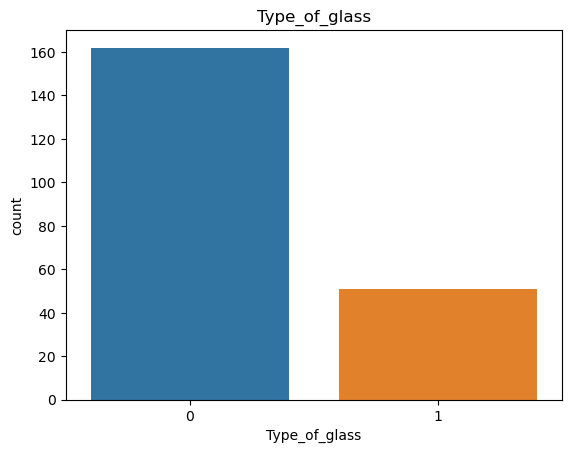

In [15]:
sns.countplot(x='Type_of_glass' , data=df)
plt.title('Type_of_glass')
plt.show()

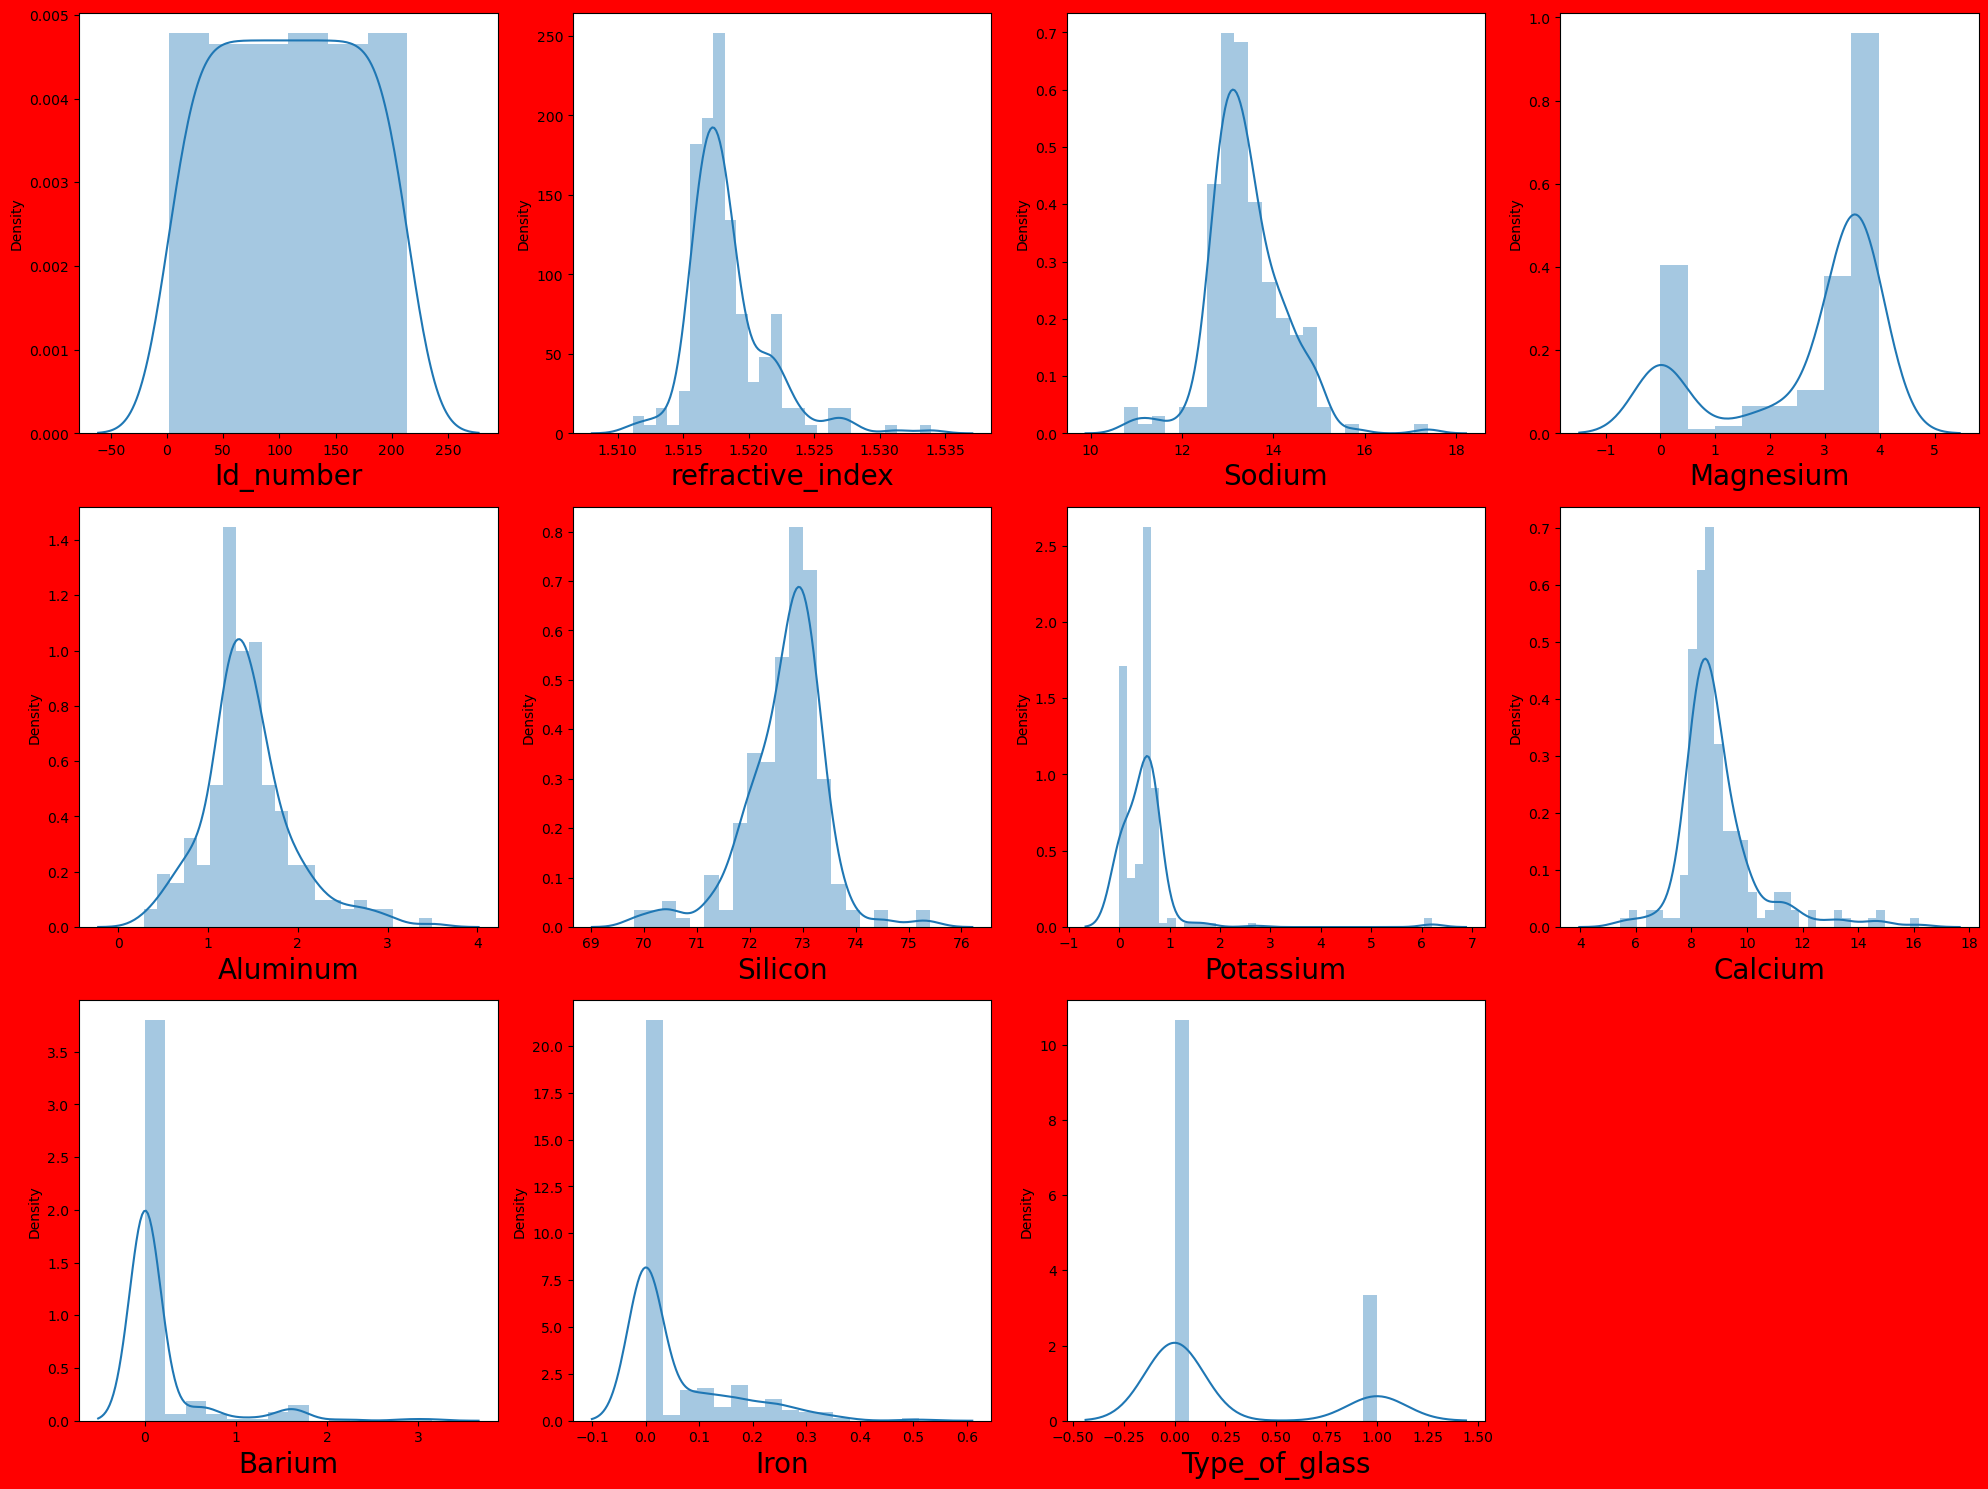

In [16]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()


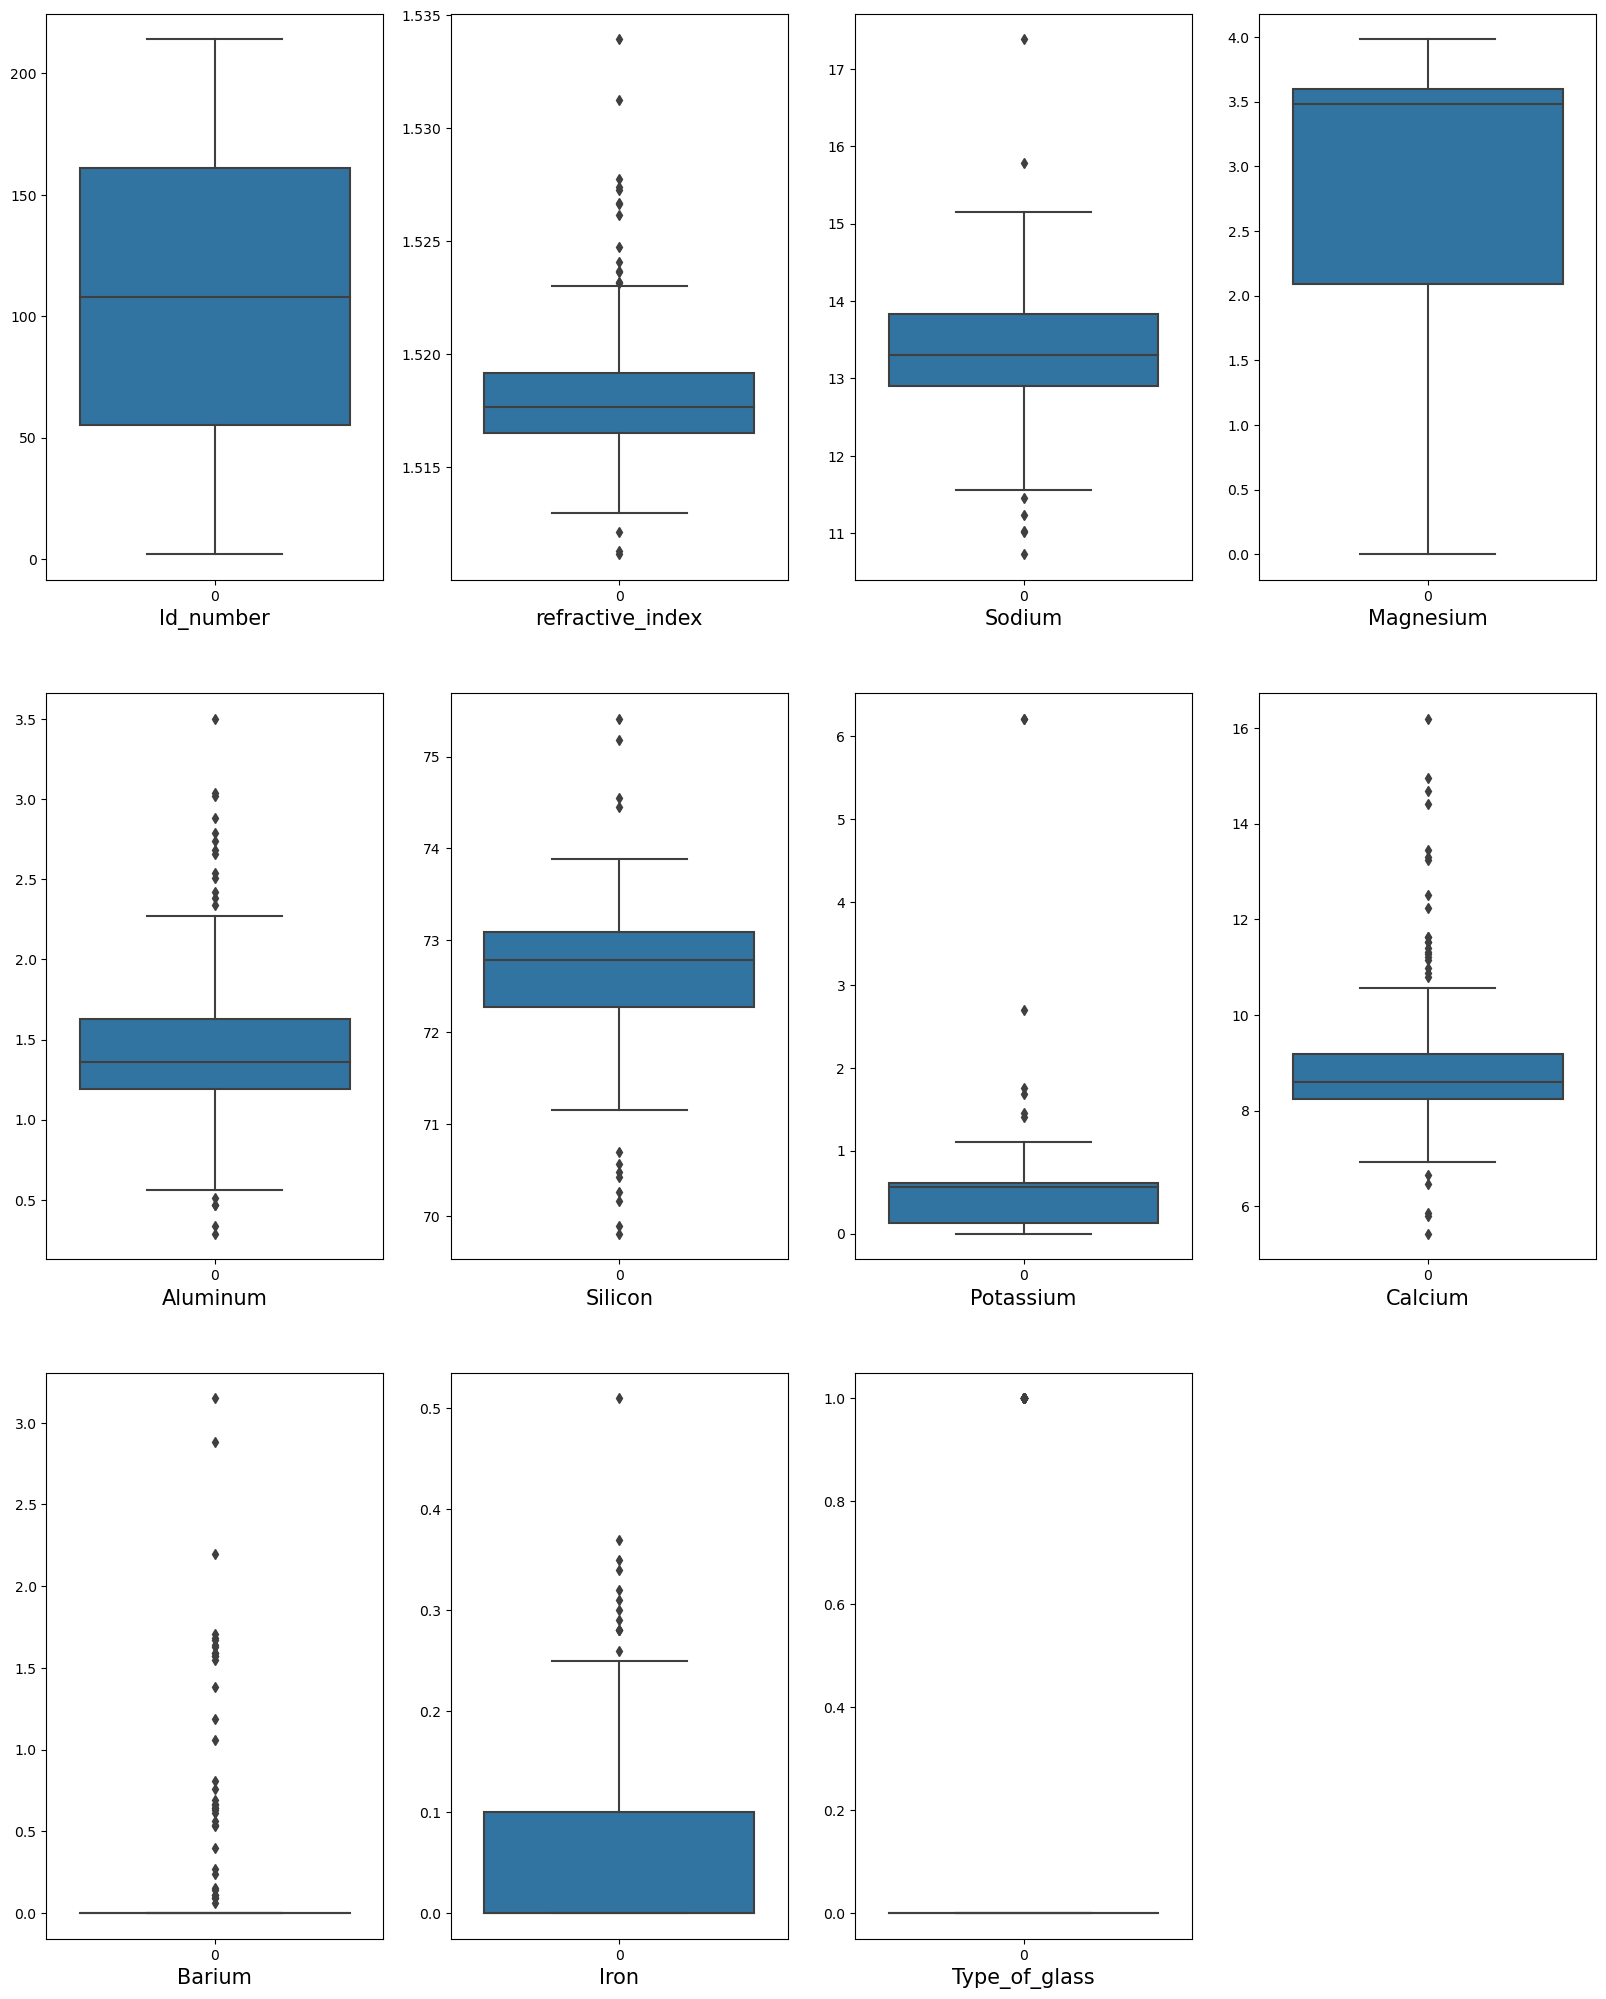

In [17]:
#Lets visualize the data
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

In [18]:
#Divide data into features and label
y = df['Type_of_glass']
X = df.drop(columns=['Type_of_glass'])

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: Type_of_glass, Length: 213, dtype: int64

In [20]:
X

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


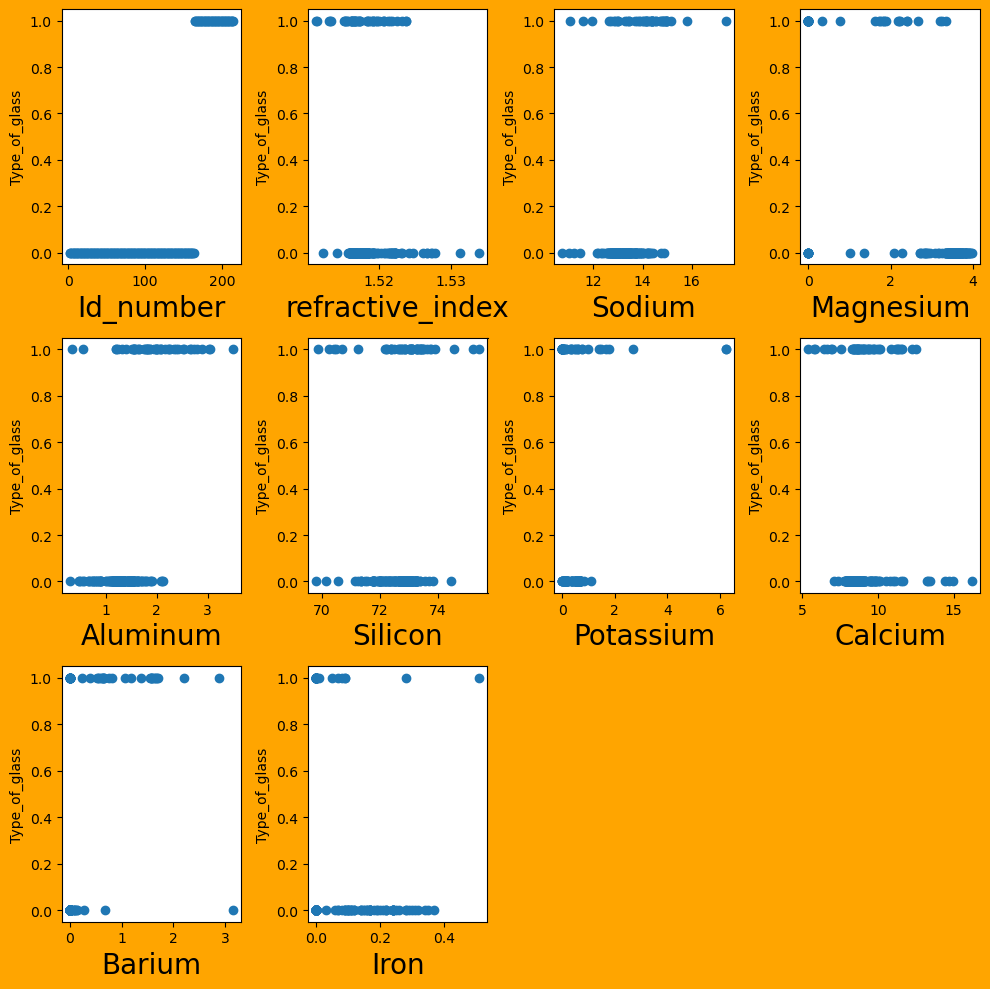

In [21]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(10,10), facecolor = 'orange')
plotnumber = 1

for column in X:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Type_of_glass',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

### Predict the accurate cost of insurance given feature

In [22]:
#data scaling. Formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#split data into train and test. module will be build on training data and tested on the test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state= 348)
y_train.head()

145    0
120    0
155    0
165    1
67     0
Name: Type_of_glass, dtype: int64

In [24]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

### Accuracy of the model (on testing data):

In [25]:
df.tail(2)

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
211,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,1
212,214,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,1


In [26]:
print('Type of Glass is :',regression.predict(scaler.transform([[213,1.51651, 14.38, 0, 1.94, 73.61, 0, 8.48, 1.57, 0]])))

Type of Glass is : [1.11105161]


In [27]:
df.head(2)

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0


In [28]:
print('Type of Glass is :',regression.predict(scaler.transform([[2,1.51651, 13.89, 3.60, 1.36, 72.73, 0.48, 7.83, 0, 0 ]])))

Type of Glass is : [-0.03450196]


In [29]:
print("Accuracy=",regression.score(x_test,y_test)*100,"%")

Accuracy= 81.95006574389893 %


In [30]:
#saving the model to the local file system

pickle.dump(regression,open('Glass','wb'))

In [31]:


loaded_model = pickle.load(open('Glass','rb'))

a = loaded_model.predict(scaler.transform([[212,1.51651, 14.38, 0, 1.94, 73.61, 0, 8.48, 1.57, 0]]))

a

array([1.10897499])

In [32]:
scaler.transform([[213,1.51651, 14.38, 0, 1.94, 73.61, 0, 8.48, 1.57, 0]])

array([[ 1.70767455, -0.60796596,  1.19204109, -1.8621639 ,  0.98950646,
         1.2366435 , -0.76608968, -0.33584439,  2.80467644, -0.58830108]])

In [33]:
regression.score(x_train,y_train)

0.7426675242464071

In [34]:
regression.score(x_test,y_test)

0.8195006574389894

In [35]:
y_pred = regression.predict(x_test)

In [36]:
y_pred

array([ 1.64925812e-01, -3.03672099e-02,  1.06335705e-03,  1.08087328e+00,
        6.91944411e-02,  6.00831104e-01,  8.40067487e-02,  1.19424801e-01,
       -1.18163959e-01,  1.64695929e-01,  1.10653694e-01,  1.07256338e-01,
        1.07499245e+00,  8.27552655e-02,  1.83874358e-01, -1.03207235e-01,
        3.71710973e-01,  1.32499241e-02,  1.08227139e+00,  1.14220148e+00,
        1.12350173e+00, -1.28476313e-01,  2.05236150e-02,  1.12927193e+00,
       -5.80835379e-02, -1.49886112e-01, -5.88686844e-02,  6.15972418e-01,
        5.52776687e-01,  9.34344835e-01, -1.65519313e-01,  1.08829471e+00,
       -9.04571904e-02,  1.93615715e-01,  1.06442201e+00, -2.11582693e-02,
       -3.51986136e-02,  1.11226907e+00,  6.53970473e-01,  1.12684715e-01,
        2.62755697e-02,  6.44236694e-02,  7.54360387e-02,  6.21108510e-02,
        1.16094819e+00, -1.28259408e-01,  4.93844960e-01,  9.73992202e-02,
        1.11976700e+00,  2.80964436e-01,  2.47035769e-01,  1.43324398e-03,
        7.33706658e-02,  

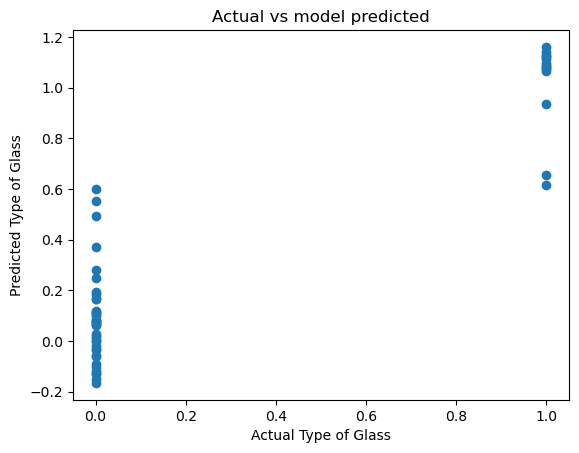

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Type of Glass')
plt.ylabel('Predicted Type of Glass')
plt.title('Actual vs model predicted')
plt.show()

In [38]:
#Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
y_pred = regression.predict(x_test)

In [40]:
mean_absolute_error(y_test,y_pred)

0.13953477190592686

In [41]:
mean_squared_error(y_test,y_pred)

0.03621128785946199

In [42]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.19029263742841443

### Now i'm sucessfully created model and our score is great so we check it for overfitting
### To check overfitting we have to use regularization technique

### Using Lasso Model

In [43]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 

In [44]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [45]:
alpha = lasscv.alpha_

In [46]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.8190399127406485e-05)

In [47]:
# now check r2 score

lasso_reg.score(x_test,y_test)*100

81.92351350288463

### Using Ridge Model

In [49]:
#Using Ridge Model

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [50]:
ridgecv.alpha_

0.09099999999999998

In [51]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [52]:
# now check r2 score

ridge_model.score(x_test,y_test)*100

81.863016642762

### DataFrame

In [54]:
Glass = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [55]:
Glass.head()

,Actual,Predicted
150,0,0.164926
56,0,-0.030367
76,0,0.001063
197,1,1.080873
60,0,0.069194


In [56]:
# 0 is Window Glasses
# 1 is Non Window Glasses